# Sunita Inderjit
## CS677 – Introduction to Machine Learning (CRN: 74016) – Fall 2023¶
### Project #1

- The goal of this project is to build machine learning model using different classifer to determine whether to buy or sell Citigroup stock

- In this project live data was downloaded from yahoo finance from  January 2015 to August 2023

- strategy1 If the next trading day's close price is greater than today's close price then the signal is ‘buy’, otherwise ‘sell’




- strategy_2: Utilize the 50-day moving average vs the 200-day moving average. 
- A golden cross(or golden crossover) is a chart pattern that involves a short-term moving average crossing above a long-term moving average. Typically, the 50-day MA is used as the short-term average, and the 200-day MA is used as the long-term average. This is an indicator of bullish (buying) signal.

## The follwing step was taken to complete this project

#### Pre-process and clean the data
- Define the Feature Variable ‘X’, and the Label/Target variable ‘y’
- Spilt the data into training and test datasets (use the 80/20 percent ratio)
- Choose a Classifier and fit it on the training dataset (take its default parameters)
-  Evaluate the Classifier on the test dataset

#### The following Machine Learning Classifier was used to build model 

- K-Nearest Neighbors (KNN) 
- Random Forest Classifier (RF)
-  Gradient Boosting Classifier (GB)
- Support Vector Machines (SVMs)
-  XGBoost Classifier

In [1]:
# import the necessary libraries

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [2]:
# read in citigroup data from yahoo finance

citi = yf.download("C", start="2016-01-01", end="2023-12-31")
citi.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,50.750000,51.189999,50.189999,51.130001,41.242661,23440200
2016-01-05,51.540001,51.610001,50.410000,50.860001,41.024876,17444900
2016-01-06,50.099998,50.580002,49.759998,50.119999,40.427959,22501800
2016-01-07,49.070000,49.380001,47.500000,47.560001,38.363003,37902900
2016-01-08,48.730000,48.740002,46.029999,46.130001,37.209530,30643000


In [3]:
# get data shape

citi.shape

(1953, 6)

In [4]:
citi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1.953000e+03
mean,59.207000,59.851787,58.532419,59.181423,51.860679,1.945283e+07
std,11.618039,11.625614,11.611648,11.615161,9.761089,8.380590e+06
min,35.470001,36.160000,32.000000,34.980000,28.250511,4.576200e+06
25%,47.820000,48.410000,47.209999,47.750000,44.930408,1.377370e+07
50%,60.639999,61.099998,60.049999,60.619999,52.451538,1.725720e+07
75%,69.360001,70.110001,68.739998,69.389999,59.831913,2.312070e+07
max,81.959999,83.110001,80.970001,81.910004,73.255165,8.656620e+07


#### Strategy1

**If the next trading day's close price is greater than today's close price then the signal is ‘buy’, otherwise ‘sell’

In [5]:
# Strategy 1: Create target variable and new col called signal
# new col contain 1 and -1 based on closed col, 1 = buy and -1 sell

citi['Strategy1'] = np.where(citi['Close'].shift(-1) > citi['Close'], 1, -1)
citi.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1
Date,,,,,,,
2016-01-04,50.750000,51.189999,50.189999,51.130001,41.242661,23440200,-1
2016-01-05,51.540001,51.610001,50.410000,50.860001,41.024876,17444900,-1
2016-01-06,50.099998,50.580002,49.759998,50.119999,40.427959,22501800,-1
2016-01-07,49.070000,49.380001,47.500000,47.560001,38.363003,37902900,-1
2016-01-08,48.730000,48.740002,46.029999,46.130001,37.209530,30643000,1


- These moving averages can be used for various purposes, such as identifying trends in the stock’s price. Often, traders look at crossovers between a short-term moving average (like the 50-period) and a long-term moving average (like the 200-period) as signals for potential buying or selling opportunities. For instance, a common strategy is to buy when the 50-day moving average crosses above the 200-day moving average ("golden cross"), and sell when it crosses below ("death cross").

- rolling(window=50): The rolling() function is used to create a rolling view of the data, where "window" refers to the number of consecutive elements that will be considered for the operation to be applied to. In this case, window=50 means that the operation will be applied to 50 consecutive elements at a time.
- mean(): This calculates the mean (average) of the elements within the specified window (i.e., the last 50 elements), which shifts one step at a time, calculating the average for the next 50 elements.

#### Strategy 2
- Utilize the 50-day moving average vs the 200-day moving average. As a signal whether to buy or sell
- if the 50 MA is below the 200 Ma day. it's a signal to sell. 

In [6]:
# Strategy 2: Golden cross of 50-day and 200-day moving averages
# create new col called MA 50 and MA 200
citi['50dma'] = citi['Close'].rolling(50).mean()
citi['200dma'] = citi['Close'].rolling(200).mean()
citi['Strategy2'] = np.where(citi['50dma'] > citi['200dma'], 1, -1) 
citi.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50dma,200dma,Strategy2
Date,,,,,,,,,,
2016-01-04,50.750000,51.189999,50.189999,51.130001,41.242661,23440200,-1,NaN,NaN,-1
2016-01-05,51.540001,51.610001,50.410000,50.860001,41.024876,17444900,-1,NaN,NaN,-1
2016-01-06,50.099998,50.580002,49.759998,50.119999,40.427959,22501800,-1,NaN,NaN,-1
2016-01-07,49.070000,49.380001,47.500000,47.560001,38.363003,37902900,-1,NaN,NaN,-1
2016-01-08,48.730000,48.740002,46.029999,46.130001,37.209530,30643000,1,NaN,NaN,-1


In [7]:
citi.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Strategy1      0
50dma         49
200dma       199
Strategy2      0
dtype: int64

In [8]:
citi.dropna(inplace=True)
citi.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Strategy1    0
50dma        0
200dma       0
Strategy2    0
dtype: int64

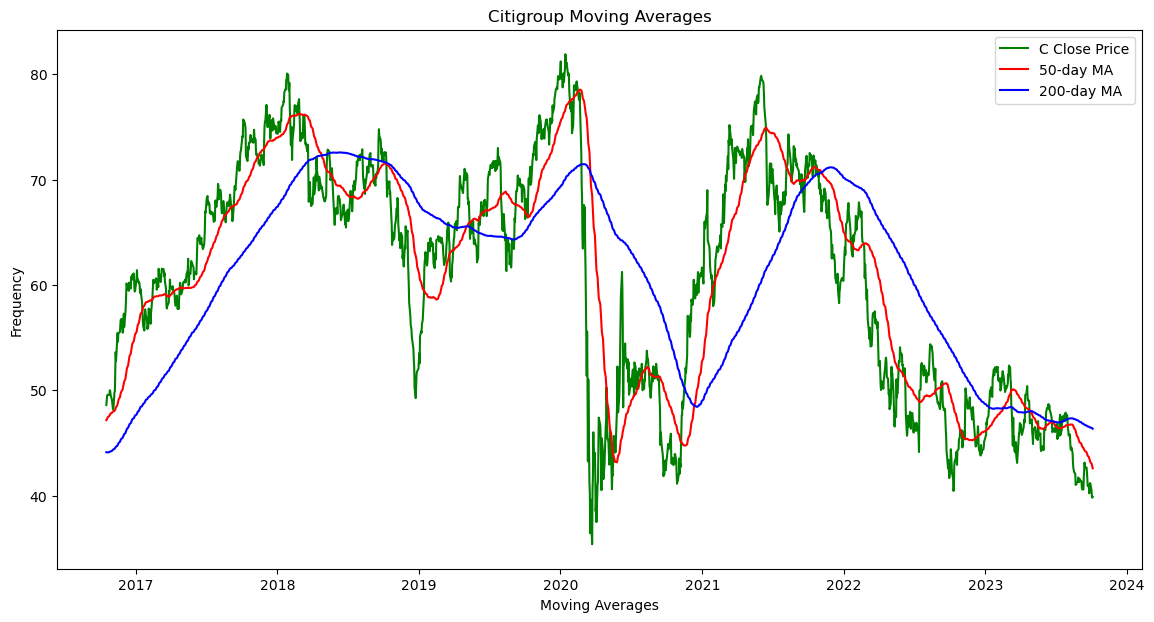

In [21]:
# visualization of moving average for 50- day and 200-days
plt.figure(figsize=(14, 7))
plt.plot(citi['Close'], label='C Close Price', color='green')
plt.plot(citi['50dma'], label='50-day MA', color = 'red')
plt.plot(citi['200dma'], label='200-day MA', color= 'blue')
plt.xlabel("Moving Averages")
plt.ylabel("Frequency")
plt.legend()
plt.title('Citigroup Moving Averages')
plt.show()

In [11]:
X = citi.drop(['Strategy1', 'Strategy2'], axis=1)
y1 = citi['Strategy1']
y2 = citi['Strategy2']

In [12]:
# Split data 80/20 into train/test
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)


In [23]:
y1_train = np.where(y1_train == -1, 0, y1_train)
y2_train = np.where(y2_train == -1, 0, y2_train)
y1_test = np.where(y1_test == -1, 0, y1_test)
y2_test = np.where(y2_test == -1, 0, y2_test)

In [24]:
# Model training and evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    xgb.XGBClassifier()
]

for classifier in classifiers:
    print(classifier)
    
    classifier.fit(X_train, y1_train)
    print("Strategy 1 Accuracy:", classifier.score(X_test, y1_test))

    classifier.fit(X_train, y2_train) 
    print("Strategy 2 Accuracy:", classifier.score(X_test, y2_test))

    print()


KNeighborsClassifier()
Strategy 1 Accuracy: 0.5356125356125356
Strategy 2 Accuracy: 0.5327635327635327

RandomForestClassifier()
Strategy 1 Accuracy: 0.5242165242165242
Strategy 2 Accuracy: 0.9886039886039886

GradientBoostingClassifier()
Strategy 1 Accuracy: 0.47293447293447294
Strategy 2 Accuracy: 0.9943019943019943

SVC()
Strategy 1 Accuracy: 0.5014245014245015
Strategy 2 Accuracy: 0.5811965811965812

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, mis

In [25]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
#Hyperparameter tunning

from sklearn.model_selection import GridSearchCV
import numpy as np

# Define classifiers and parameter grids

classifiers_params = [
    {
        'classifier': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    {
        'classifier': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}
    }
]

# Define strategies

strategies = {
    'Strategy 1': {
        'train': y1_train,
        'test': y1_test
    },
    'Strategy 2': {
        'train': y2_train,
        'test': y2_test
    }
}

# Loop through strategies and classifiers to perform grid search

for strategy_name, strategy_data in strategies.items():
    print(f"\n{strategy_name}")
    
    for clf_param_set in classifiers_params:
        classifier = clf_param_set['classifier']
        param_grid = clf_param_set['params']
        
        print(f"\nTuning {classifier.__class__.__name__}...")
        
        grid_search = GridSearchCV(classifier, param_grid, cv=5)
        grid_search.fit(X_train_scaled, strategy_data['train'])
        
        best_classifier = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        
        # evaluate the best_classifier on the test data
        accuracy = best_classifier.score(X_test_scaled, strategy_data['test'])
        print(f"{strategy_name} Accuracy with {classifier.__class__.__name__}: {accuracy:.2f}")



Strategy 1

Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Strategy 1 Accuracy with KNeighborsClassifier: 0.47

Tuning XGBClassifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Strategy 1 Accuracy with XGBClassifier: 0.51

Strategy 2

Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Strategy 2 Accuracy with KNeighborsClassifier: 0.97

Tuning XGBClassifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Strategy 2 Accuracy with XGBClassifier: 0.99


### Conclusion:

**Based on both strategies and the different classifer. Strategy2 perform better and the best classifier was XGBoost, Gradient Boost and Random Forest  with above 90% accuracy.